# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_validate

# Extract Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio /Final Task Virtual Internship Rakamin - ID X Parters/loan_data_2007_2014.csv')
df.head()

<ipython-input-4-3b080dd52964>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio /Final Task Virtual Internship Rakamin - ID X Parters/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df.shape

(466285, 75)

In [7]:
df['member_id'].duplicated().sum()

0

In [8]:
df['id'].duplicated().sum()

0

Id dan member id tidak ada duplikat, sehingga  1 baris merepresentasikan 1 customer yang mengajukan pinjaman

# Check Data

## Statistic Descriptive

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


## Missing Values

In [10]:
obj_col = df.select_dtypes('object').columns
num_col = df.select_dtypes(['int64', 'float64']).columns

### Categorical

In [11]:
missing_df = pd.DataFrame(df[obj_col].isna().sum()).rename({0:'missing_count'}, axis=1)
missing_df['missing_percent'] = missing_df['missing_count']/len(df)*100
missing_df = missing_df[missing_df['missing_percent']>0]
print(f'Dari {df[obj_col].shape[1]}, ada {len(missing_df)} kolom yang datanya missing')

pd.set_option('display.precision', 3)
missing_df.sort_values('missing_percent', ascending=False).\
  style.background_gradient(cmap='gist_heat').set_caption('missing count')

Dari 22, ada 8 kolom yang datanya missing


,missing_count,missing_percent
desc,340302,72.981546
next_pymnt_d,227214,48.728567
emp_title,27588,5.916553
emp_length,21008,4.505399
last_pymnt_d,376,0.080637
last_credit_pull_d,42,0.009007
earliest_cr_line,29,0.006219
title,20,0.004289


### Numeric

In [12]:
missing_df = pd.DataFrame(df[num_col].isna().sum()).rename({0:'missing_count'}, axis=1)
missing_df['missing_percent'] = missing_df['missing_count']/len(df)*100
missing_df = missing_df[missing_df['missing_percent']>0] #remove columns with more than 30% values missings
print(f'Dari {df[num_col].shape[1]}, ada {len(missing_df)} kolom yang datanya missing')

pd.set_option('display.precision', 3)
missing_df.sort_values('missing_percent', ascending=False).\
  style.background_gradient(cmap='gist_heat').set_caption('missing count')

Dari 53, ada 32 kolom yang datanya missing


,missing_count,missing_percent
inq_last_12m,466285,100.000000
annual_inc_joint,466285,100.000000
open_il_12m,466285,100.000000
open_il_6m,466285,100.000000
open_acc_6m,466285,100.000000
total_bal_il,466285,100.000000
il_util,466285,100.000000
open_rv_12m,466285,100.000000
verification_status_joint,466285,100.000000
dti_joint,466285,100.000000


Fitur dengan missing values > 30% tidak akan dipakai

### All Data

In [13]:
missing_df = pd.DataFrame(df.isna().sum()).rename({0:'missing_count'}, axis=1)
missing_df['missing_percent'] = missing_df['missing_count']/len(df)*100
missing_df = missing_df[missing_df['missing_percent']>30]

### Clean Data (Null < 30%)

In [14]:
clean_columns = [x for x in df.columns if x not in missing_df.index]

clean_data = df[clean_columns]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [15]:
data_mis_under_30 = clean_data[
    [
        'tot_cur_bal',
         'tot_coll_amt',
         'total_rev_hi_lim',
         'emp_title',
         'emp_length',
         'last_pymnt_d',
         'revol_util',
         'collections_12_mths_ex_med',
         'last_credit_pull_d',
         'inq_last_6mths',
         'earliest_cr_line',
         'delinq_2yrs',
         'open_acc',
         'pub_rec',
         'acc_now_delinq',
         'total_acc',
         'title',
         'annual_inc'
    ]
]

In [16]:
df_mis_obj = data_mis_under_30.select_dtypes('object').columns
df_mis_num = data_mis_under_30.select_dtypes(['int64', 'float64']).columns

# Cleaning and Pre-processing

## Categoric

In [17]:
df_mis_obj

Index(['emp_title', 'emp_length', 'last_pymnt_d', 'last_credit_pull_d',
       'earliest_cr_line', 'title'],
      dtype='object')

In [18]:
clean_data[df_mis_obj].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   emp_title           438697 non-null  object
 1   emp_length          445277 non-null  object
 2   last_pymnt_d        465909 non-null  object
 3   last_credit_pull_d  466243 non-null  object
 4   earliest_cr_line    466256 non-null  object
 5   title               466265 non-null  object
dtypes: object(6)
memory usage: 21.3+ MB


### emp_title

In [19]:
clean_data['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

### emp_length

In [20]:
clean_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Mengubah menjadi numeric

In [21]:
clean_data['emp_length']

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [22]:
clean_data['emp_length_int'] = clean_data['emp_length'].str.replace('\+ years', '')
clean_data['emp_length_int'] = clean_data['emp_length_int'].str.replace('< 1 year', str(0))
clean_data['emp_length_int'] = clean_data['emp_length_int'].str.replace(' years', '')
clean_data['emp_length_int'] = clean_data['emp_length_int'].str.replace(' year', '')

<ipython-input-22-ccc32b187c45>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_data['emp_length_int'] = clean_data['emp_length'].str.replace('\+ years', '')
<ipython-input-22-ccc32b187c45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['emp_length_int'] = clean_data['emp_length'].str.replace('\+ years', '')
<ipython-input-22-ccc32b187c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['emp_length_int'] = clean_data['emp_leng

In [23]:
clean_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [24]:
# clean_data['emp_length_int'] = clean_data['emp_length_int'].astype(float)
clean_data['emp_length_int'] = pd.to_numeric(clean_data['emp_length_int'])

<ipython-input-24-402355de85a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['emp_length_int'] = pd.to_numeric(clean_data['emp_length_int'])


drop emp_length column

In [25]:
clean_data.drop(columns='emp_length', axis=1, inplace=True)

<ipython-input-25-84e5b47f8ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns='emp_length', axis=1, inplace=True)


Fill missing values with mean

In [26]:
clean_data['emp_length_int'].fillna(clean_data['emp_length_int'].mean(), inplace=True)

<ipython-input-26-f0a2a7070c99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['emp_length_int'].fillna(clean_data['emp_length_int'].mean(), inplace=True)


### last_pymnt_d

Format = Bulan-Tahun

In [27]:
clean_data['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [28]:
clean_data['last_pymnt_d_date_format'] = pd.to_datetime(clean_data['last_pymnt_d'], format='%b-%y')

<ipython-input-28-5ee30565f358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['last_pymnt_d_date_format'] = pd.to_datetime(clean_data['last_pymnt_d'], format='%b-%y')


In [29]:
clean_data['last_pymnt_d_date_format']

0        2015-01-01
1        2013-04-01
2        2014-06-01
3        2015-01-01
4        2016-01-01
            ...    
466280   2016-01-01
466281   2014-12-01
466282   2016-01-01
466283   2014-12-01
466284   2016-01-01
Name: last_pymnt_d_date_format, Length: 466285, dtype: datetime64[ns]

In [30]:
clean_data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['last_pymnt_d_date_format']) / np.timedelta64(1, 'M')))

<ipython-input-30-72557090a347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['last_pymnt_d_date_format']) / np.timedelta64(1, 'M')))


In [31]:
clean_data.drop(columns=['last_pymnt_d', 'last_pymnt_d_date_format'], inplace=True)

<ipython-input-31-5a2c0ce0b071>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['last_pymnt_d', 'last_pymnt_d_date_format'], inplace=True)


Fill missing values with mean

In [32]:
clean_data['mths_since_last_pymnt_d'].fillna(clean_data['mths_since_last_pymnt_d'].mean(), inplace=True)

<ipython-input-32-027ebd936fc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_last_pymnt_d'].fillna(clean_data['mths_since_last_pymnt_d'].mean(), inplace=True)


### last_credit_pull_d

format = bulan-tahun

In [33]:
clean_data['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [34]:
clean_data['last_credit_pull_d_date_format'] = pd.to_datetime(clean_data['last_credit_pull_d'], format='%b-%y')

<ipython-input-34-8514480a6787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['last_credit_pull_d_date_format'] = pd.to_datetime(clean_data['last_credit_pull_d'], format='%b-%y')


In [35]:
clean_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['last_credit_pull_d_date_format']) / np.timedelta64(1, 'M')))

<ipython-input-35-ee2b7739622b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['last_credit_pull_d_date_format']) / np.timedelta64(1, 'M')))


In [36]:
clean_data.drop(columns=['last_credit_pull_d_date_format', 'last_credit_pull_d'], inplace=True)

<ipython-input-36-fe31663186f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['last_credit_pull_d_date_format', 'last_credit_pull_d'], inplace=True)


Fill missing values with mean

In [37]:
clean_data['mths_since_last_credit_pull_d'].fillna(clean_data['mths_since_last_credit_pull_d'].mean(), inplace=True)

<ipython-input-37-7da456c3df4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_last_credit_pull_d'].fillna(clean_data['mths_since_last_credit_pull_d'].mean(), inplace=True)


### earliest_cr_line

In [38]:
clean_data['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [39]:
clean_data['earliest_cr_line_date_format'] = pd.to_datetime(clean_data['earliest_cr_line'], format='%b-%y')

<ipython-input-39-85f78c4a6c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['earliest_cr_line_date_format'] = pd.to_datetime(clean_data['earliest_cr_line'], format='%b-%y')


In [40]:
clean_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['earliest_cr_line_date_format']) / np.timedelta64(1, 'M')))

<ipython-input-40-afb489800d65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - clean_data['earliest_cr_line_date_format']) / np.timedelta64(1, 'M')))


In [41]:
clean_data['mths_since_earliest_cr_line'].describe().T

count    466256.000
mean        239.482
std          93.975
min        -612.000
25%         183.000
50%         225.000
75%         285.000
max         587.000
Name: mths_since_earliest_cr_line, dtype: float64

Ada nilai negatif

In [42]:
clean_data[clean_data['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date_format', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date_format,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


Nilai negatif muncul karena kesalahan mengubah tahun 62 menjadi tahun 2062, bukan menjadi 1962

In [43]:
clean_data.loc[clean_data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = clean_data['mths_since_earliest_cr_line'].max()

In [44]:
clean_data.drop(columns=['earliest_cr_line_date_format', 'earliest_cr_line'], inplace=True)

<ipython-input-44-569425dd9183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['earliest_cr_line_date_format', 'earliest_cr_line'], inplace=True)


Fill missing values with mean

In [45]:
clean_data['mths_since_earliest_cr_line'].fillna(clean_data['mths_since_earliest_cr_line'].mean(), inplace=True)

<ipython-input-45-d1ba95cd002f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['mths_since_earliest_cr_line'].fillna(clean_data['mths_since_earliest_cr_line'].mean(), inplace=True)


## Numeric

In [46]:
clean_data[df_mis_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tot_cur_bal                 396009 non-null  float64
 1   tot_coll_amt                396009 non-null  float64
 2   total_rev_hi_lim            396009 non-null  float64
 3   revol_util                  465945 non-null  float64
 4   collections_12_mths_ex_med  466140 non-null  float64
 5   inq_last_6mths              466256 non-null  float64
 6   delinq_2yrs                 466256 non-null  float64
 7   open_acc                    466256 non-null  float64
 8   pub_rec                     466256 non-null  float64
 9   acc_now_delinq              466256 non-null  float64
 10  total_acc                   466256 non-null  float64
 11  annual_inc                  466281 non-null  float64
dtypes: float64(12)
memory usage: 42.7 MB


In [47]:
clean_data['tot_cur_bal'].fillna(clean_data['tot_cur_bal'].median(), inplace=True)
clean_data['tot_coll_amt'].fillna(clean_data['tot_coll_amt'].median(), inplace=True)
clean_data['total_rev_hi_lim'].fillna(clean_data['total_rev_hi_lim'].median(), inplace=True)
clean_data['revol_util'].fillna(clean_data['revol_util'].median(), inplace=True)
clean_data['collections_12_mths_ex_med'].fillna(clean_data['collections_12_mths_ex_med'].median(), inplace=True)
clean_data['inq_last_6mths'].fillna(clean_data['inq_last_6mths'].median(), inplace=True)
clean_data['delinq_2yrs'].fillna(clean_data['delinq_2yrs'].median(), inplace=True)
clean_data['open_acc'].fillna(clean_data['open_acc'].median(), inplace=True)
clean_data['pub_rec'].fillna(clean_data['pub_rec'].median(), inplace=True)
clean_data['acc_now_delinq'].fillna(clean_data['acc_now_delinq'].median(), inplace=True)
clean_data['total_acc'].fillna(clean_data['total_acc'].median(), inplace=True)
clean_data['annual_inc'].fillna(clean_data['annual_inc'].median(), inplace=True)

<ipython-input-47-11e91cac096c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['tot_cur_bal'].fillna(clean_data['tot_cur_bal'].median(), inplace=True)
<ipython-input-47-11e91cac096c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['tot_coll_amt'].fillna(clean_data['tot_coll_amt'].median(), inplace=True)
<ipython-input-47-11e91cac096c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['total_rev_hi_lim

# Define Target

In [48]:
clean_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [49]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

clean_data['bad_flag'] = np.where(clean_data['loan_status'].isin(bad_status), 1, 0)

<ipython-input-49-0c645d3b5a33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['bad_flag'] = np.where(clean_data['loan_status'].isin(bad_status), 1, 0)


In [50]:
clean_data['bad_flag'].value_counts(normalize=True)*100

0    89.069
1    10.931
Name: bad_flag, dtype: float64

In [51]:
clean_data.drop(columns='loan_status', inplace=True)

<ipython-input-51-30c8cb3eb1b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns='loan_status', inplace=True)


In [52]:
# clean_data['tot_cur_bal'].plot(kind='hist')

In [53]:
# for i, col in enumerate(clean_data[df_mis_num]):
#     plt.figure(i)
#     sns.histplot(clean_data[col])

# Exploratory Data Analysis

In [54]:
clean_data.drop(columns=['id', 'member_id'], inplace=True)

<ipython-input-54-d04dc8db813c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['id', 'member_id'], inplace=True)


In [55]:
clean_data.drop(columns='Unnamed: 0', inplace=True)

<ipython-input-55-4948c5d89002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns='Unnamed: 0', inplace=True)


## Correlation

<ipython-input-56-4cd25203659f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_data.corr(), fmt='.1f', annot=True)


<Axes: >

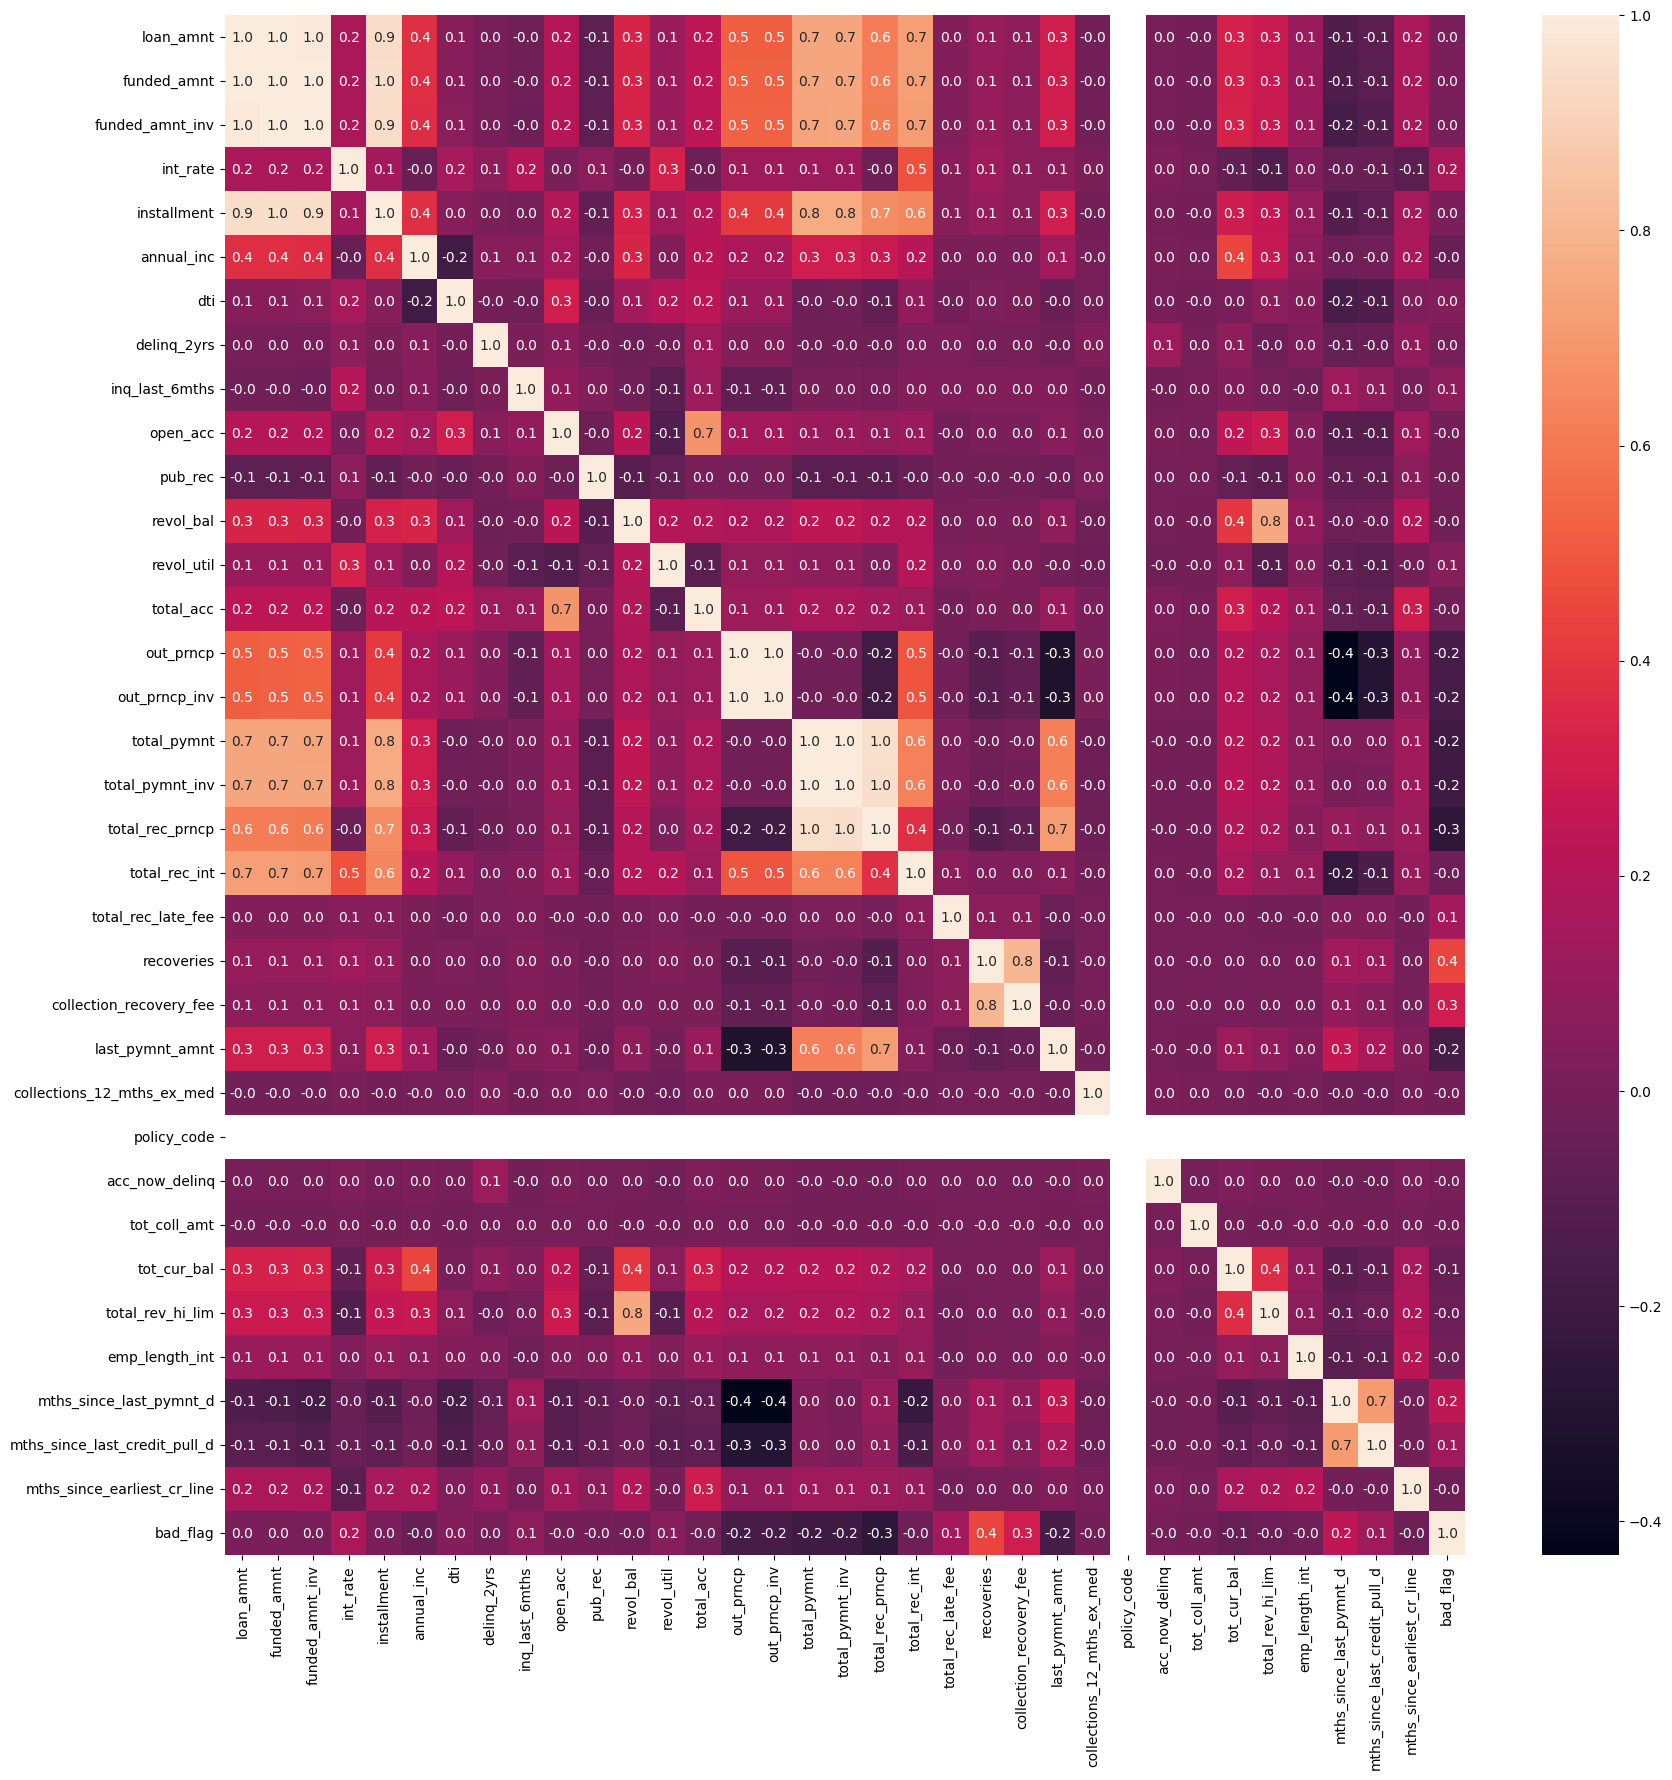

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(clean_data.corr(), fmt='.1f', annot=True)

Fitur dengan korelasi > 0.7 akan di hapus

In [57]:
corr_matrix = clean_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.8)]

<ipython-input-57-4740a0d43d86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = clean_data.corr().abs()
<ipython-input-57-4740a0d43d86>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [58]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee']

In [59]:
clean_data.drop(columns=to_drop_hicorr, inplace=True)

<ipython-input-59-000aee745505>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=to_drop_hicorr, inplace=True)


## Categorical Features

Fitur kategorik dengan jumlah unik yang banyak akan di drop

In [60]:
clean_data.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
home_ownership              6
verification_status         3
issue_d                    91
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [61]:
clean_data.drop(['emp_title', 'url', 'title', 'zip_code'], axis=1, inplace=True)

<ipython-input-61-462478b2bf76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['emp_title', 'url', 'title', 'zip_code'], axis=1, inplace=True)


## Persebaran Data Categoric

In [62]:
# new_data['emp_length'].value_counts().plot(kind='bar')

In [63]:
# for col in clean_data[df_mis_obj]:
#   print(f'Kolom {col}\n\nValues: \n{clean_data[col].value_counts()}\n')

In [64]:
# print(f'Kolom missing object: \n{df_mis_obj}')

## Persebaran Data Numeric

In [65]:
# for col in clean_data[df_mis_num]:
  # print(f'Kolom {col}\n\nValues: \n{clean_data[col].value_counts()}\n')

In [66]:
# print(f'Kolom missing numeric: \n{df_mis_num}')

# Feature Scaling

In [67]:
cat_cols = clean_data.select_dtypes(include='object').columns.to_list()
cat_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [68]:
clean_data.select_dtypes('object').nunique()

term                    2
grade                   7
sub_grade              35
home_ownership          6
verification_status     3
issue_d                91
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
application_type        1
dtype: int64

In [69]:
clean_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

## term

In [70]:
clean_data['term_int'] = clean_data['term'].str.replace(' months', '')
clean_data['term_int'] = clean_data['term_int'].str.replace(' ', '')
clean_data['term_int'] = pd.to_numeric(clean_data['term_int'])

<ipython-input-70-8388b63fe272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['term_int'] = clean_data['term'].str.replace(' months', '')
<ipython-input-70-8388b63fe272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['term_int'] = clean_data['term_int'].str.replace(' ', '')
<ipython-input-70-8388b63fe272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [71]:
clean_data['term_int'].unique()

array([36, 60])

In [72]:
clean_data.drop(columns='term', inplace=True)

<ipython-input-72-3f2b787f06b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns='term', inplace=True)


## initial_list_status

In [73]:
clean_data['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [74]:
copy = clean_data.copy()

In [75]:
clean_data['initial_list_status'] = clean_data['initial_list_status'].apply(lambda x: 0 if x is 'f' else 1)

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-75-7162f2c9c637>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  clean_data['initial_list_status'] = clean_data['initial_list_status'].apply(lambda x: 0 if x is 'f' else 1)
<ipython-input-75-7162f2c9c637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['initial_list_status'] = clean_data['initial_list_status'].apply(lambda x: 0 if x is 'f' else 1)


In [76]:
clean_data['initial_list_status'].unique()

array([0, 1])

## pymnt_plan

In [77]:
clean_data['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [78]:
clean_data['pymnt_plan'] = clean_data['pymnt_plan'].apply(lambda x: 0 if x is 'n' else 1)

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-78-17e5cf1e878b>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  clean_data['pymnt_plan'] = clean_data['pymnt_plan'].apply(lambda x: 0 if x is 'n' else 1)
<ipython-input-78-17e5cf1e878b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['pymnt_plan'] = clean_data['pymnt_plan'].apply(lambda x: 0 if x is 'n' else 1)


## application_type

In [79]:
clean_data['application_type'] = clean_data['application_type'].apply(lambda x: 1 if x is 'INDIVIDUAL' else 0)

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-79-260f5229053c>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  clean_data['application_type'] = clean_data['application_type'].apply(lambda x: 1 if x is 'INDIVIDUAL' else 0)
<ipython-input-79-260f5229053c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['application_type'] = clean_data['application_type'].apply(lambda x: 1 if x is 'INDIVIDUAL' else 0)


## verification_status

In [80]:
clean_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [81]:
values = {
    'Verified': 0,
    'Source Verified': 1,
    'Not Verified': 2,
}

In [82]:
clean_data['verification_status'] = clean_data['verification_status'].map(values)

<ipython-input-82-a76c52d279a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['verification_status'] = clean_data['verification_status'].map(values)


## grade

In [83]:
clean_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [84]:
values = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
}

In [85]:
clean_data['grade'] = clean_data['grade'].map(values)

<ipython-input-85-c2c74a10dabb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['grade'] = clean_data['grade'].map(values)


## home_ownership

In [86]:
clean_data['home_ownership'] = clean_data['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' else x)

<ipython-input-86-da9579a15ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['home_ownership'] = clean_data['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' else x)


In [87]:
clean_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [88]:
values = {
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3,
    'NONE': 4,
}

In [89]:
clean_data['home_ownership'] = clean_data['home_ownership'].map(values)

<ipython-input-89-f86fdcd2c583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['home_ownership'] = clean_data['home_ownership'].map(values)


## others

sub_grade     35
issue_d       91
purpose       14
addr_state    50

In [90]:
# clean_data['sub_grade'].unique()
# clean_data['issue_d'].unique()
# clean_data['purpose'].unique()
# clean_data['addr_state'].unique()

#Standardization

In [91]:
numerical_cols = [col for col in clean_data.columns.tolist() if col not in cat_cols + ['bad_flag']]

In [92]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(clean_data[numerical_cols]), columns=numerical_cols)

In [93]:
cat_cols = clean_data.select_dtypes(include='object').columns.to_list()
cat_cols

['sub_grade', 'issue_d', 'purpose', 'addr_state']

In [94]:
one_hot = pd.get_dummies(clean_data[cat_cols], drop_first=True)

In [95]:
new_data = pd.concat([one_hot, std, clean_data[['bad_flag']]], axis=1)

In [117]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sub_grade_A2,466285.0,2.350e-02,0.151,0.000,0.000,0.000,0.000,1.000
sub_grade_A3,466285.0,2.695e-02,0.162,0.000,0.000,0.000,0.000,1.000
sub_grade_A4,466285.0,4.084e-02,0.198,0.000,0.000,0.000,0.000,1.000
sub_grade_A5,466285.0,4.666e-02,0.211,0.000,0.000,0.000,0.000,1.000
sub_grade_B1,466285.0,4.906e-02,0.216,0.000,0.000,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...
mths_since_last_pymnt_d,466285.0,-1.131e-15,1.000,-0.648,-0.648,-0.570,0.289,6.928
mths_since_last_credit_pull_d,466285.0,1.039e-15,1.000,-0.420,-0.420,-0.420,-0.212,10.373
mths_since_earliest_cr_line,466285.0,1.317e-17,1.000,-1.959,-0.675,-0.190,0.493,3.986
term_int,466285.0,-1.269e-16,1.000,-0.616,-0.616,-0.616,1.623,1.623


# Modeling

In [96]:
X = new_data.drop('bad_flag', axis=1)
y = new_data['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# def eval_classification(model):
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)
#     y_pred_proba = model.predict_proba(X_test)
#     y_pred_proba_train = model.predict_proba(X_train)

#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     #
#     # score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
#     # print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
#     # print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [98]:
# new_data['grade'].isna().sum()

## Logistic Regression

In [99]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
# lg_y_predict = lg.predict(X_test)
y_pred_lg = lg.predict(X_test)
y_pred_train_lg = lg.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_pred_proba_lg = lg.predict_proba(X_test)[:][:,1]

df_actual_predicted_lg = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_lg, columns=['y_pred_proba_lg'])], axis=1)
df_actual_predicted_lg.index = y_test.index

In [101]:
print(f"Confusion Matrix (Train Set)\n {confusion_matrix(y_train, y_pred_train_lg)}")
print(f"Confusion Matrix (Test Set)\n {confusion_matrix(y_test, y_pred_lg)}")

Confusion Matrix (Train Set)
 [[331741    509]
 [  7047  33731]]
Confusion Matrix (Test Set)
 [[82910   157]
 [ 1800  8390]]


Precision (Train Set): 0.99
Precision (Test Set): 0.98
Recall (Train Set): 0.83
Recall (Test Set): 0.82


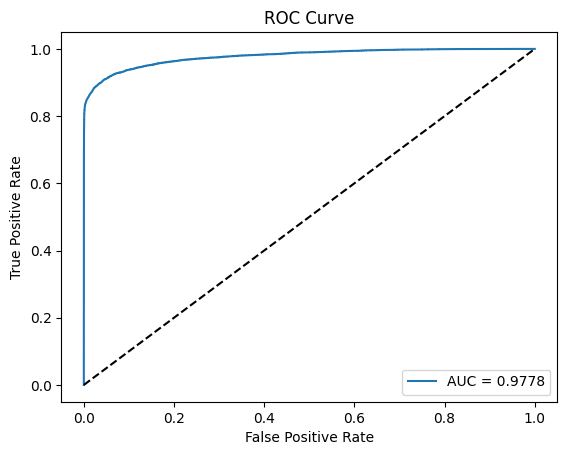

In [102]:
fpr, tpr, tr = roc_curve(df_actual_predicted_lg['y_actual'], df_actual_predicted_lg['y_pred_proba_lg'])
auc = roc_auc_score(df_actual_predicted_lg['y_actual'], df_actual_predicted_lg['y_pred_proba_lg'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train_lg))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_lg))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train_lg))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_lg))

### Hyperparameter Tuning

In [103]:
# def draw_learning_curve(param_values):
#     train_scores = []
#     test_scores = []

#     for c in param_values:
#         model = LogisticRegression(penalty='l2', C=c)
#         model.fit(X_train, y_train)

#         # eval on train
#         y_pred_train_proba = model.predict_proba(X_train)
#         train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
#         train_scores.append(train_auc)

#         # eval on test
#         y_pred_proba = model.predict_proba(X_test)
#         test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
#         test_scores.append(test_auc)

#         print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

#     plt.plot(param_values, train_scores, label='Train')
#     plt.plot(param_values, test_scores, label='Test')
#     plt.xlabel('C')
#     plt.ylabel('AUC')
#     plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
#     plt.legend()
#     plt.show()

### Feature Importance

In [104]:
X.columns

Index(['sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1',
       ...
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'emp_length_int', 'mths_since_last_pymnt_d',
       'mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line',
       'term_int'],
      dtype='object', length=214)

In [105]:
sorted(lg.coef_.tolist()[0], reverse=True)

[22.22763540151192,
 10.689478079330014,
 3.2429089253687056,
 2.881620392715703,
 2.827412829997931,
 2.8042551779144986,
 2.72024239182293,
 2.5870665504541885,
 2.5810788489179166,
 2.4067932173308684,
 2.3432996531623274,
 2.2662081155155764,
 2.2158057670693543,
 2.08893494920767,
 2.0697606340571553,
 2.0229382109715197,
 1.9702244154631439,
 1.8838938857136769,
 1.868485437954365,
 1.8646826583623513,
 1.7309989340149756,
 1.6871229415563658,
 1.6497186835927402,
 1.627978599730298,
 1.6274284768119522,
 1.5770105889276742,
 1.5746698941550388,
 1.552197060150034,
 1.5227453434128855,
 1.5098278250254662,
 1.492880635259019,
 1.4313890760660573,
 1.362490448021011,
 1.1769180184307815,
 1.1436557757845953,
 1.0924249440452078,
 1.0729660940653325,
 1.0105434365143402,
 0.9982787581109455,
 0.9691905007877308,
 0.8761699290279705,
 0.8100761657870063,
 0.7937746382742231,
 0.7919285744440765,
 0.7769131534638383,
 0.653460459354611,
 0.6534254490855272,
 0.6454349711676166,
 0.63

## Decision Tree

In [106]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)
y_pred_train_dtree = dtree.predict(X_train)

In [107]:
print(f"Confusion Matrix (Train Set)\n {confusion_matrix(y_train, y_pred_train_dtree)}")
print(f"Confusion Matrix (Test Set)\n {confusion_matrix(y_test, y_pred_dtree)}")

Confusion Matrix (Train Set)
 [[332250      0]
 [     0  40778]]
Confusion Matrix (Test Set)
 [[82640   427]
 [  437  9753]]


In [108]:
y_pred_proba_dtree = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted_dtree = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_dtree, columns=['y_pred_proba_dtree'])], axis=1)
df_actual_predicted_dtree.index = y_test.index

Precision (Train Set): 1.00
Precision (Test Set): 0.96
Recall (Train Set): 1.00
Recall (Test Set): 0.96


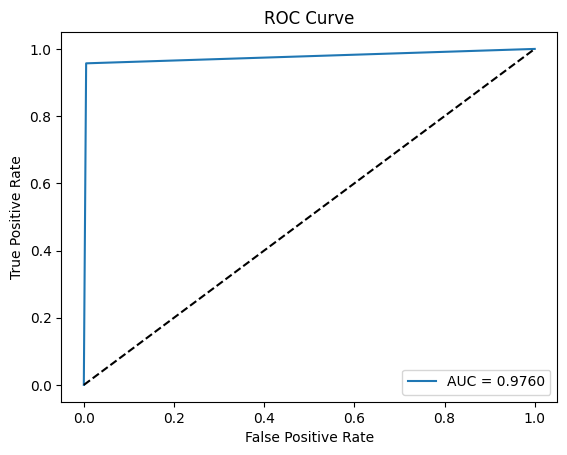

In [109]:
fpr, tpr, tr = roc_curve(df_actual_predicted_dtree['y_actual'], df_actual_predicted_dtree['y_pred_proba_dtree'])
auc = roc_auc_score(df_actual_predicted_dtree['y_actual'], df_actual_predicted_dtree['y_pred_proba_dtree'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train_dtree))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_dtree))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train_dtree))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_dtree))

### Feature Importance

In [111]:
# import shap

# explainer = shap.TreeExplainer(dtree)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test)

## Random Forest

In [112]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [113]:
print(f"Confusion Matrix (Train Set)\n {confusion_matrix(y_train, y_pred_train_rf)}")
print(f"Confusion Matrix (Test Set)\n {confusion_matrix(y_test, y_pred_rf)}")

Confusion Matrix (Train Set)
 [[332250      0]
 [     4  40774]]
Confusion Matrix (Test Set)
 [[83059     8]
 [  667  9523]]


In [114]:
y_pred_proba_rf = rf.predict_proba(X_test)[:][:,1]

df_actual_predicted_rf = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_rf, columns=['y_pred_proba_rf'])], axis=1)
df_actual_predicted_rf.index = y_test.index

Precision (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Train Set): 1.00
Recall (Test Set): 0.93


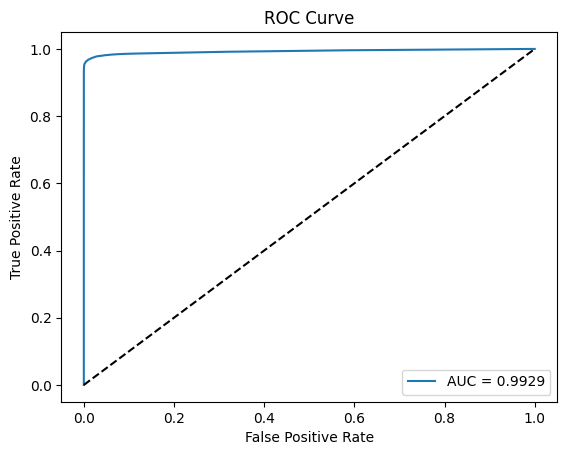

In [115]:
fpr, tpr, tr = roc_curve(df_actual_predicted_rf['y_actual'], df_actual_predicted_rf['y_pred_proba_rf'])
auc = roc_auc_score(df_actual_predicted_rf['y_actual'], df_actual_predicted_rf['y_pred_proba_rf'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train_rf))
print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_rf))
print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train_rf))
print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_rf))

###Feature Importance

In [ ]:
# import shap

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values[1], X_test)

#Summary

*   Model random forest menghasilkan score roc_auc yang paling baik dan tidak overfit atau underfit
*   Pembuatan model tidak melakukan Hyperparameter Tuning karena kendala resource
*   Precision dipilih karena ingin fokus mengurangi nilai false positive (FP)

